In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler

In [2]:
# download the dataset
# read the input data
raw_data= pd.read_csv("creditcard.csv")
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


In [3]:
# display the first rows in the dataset
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


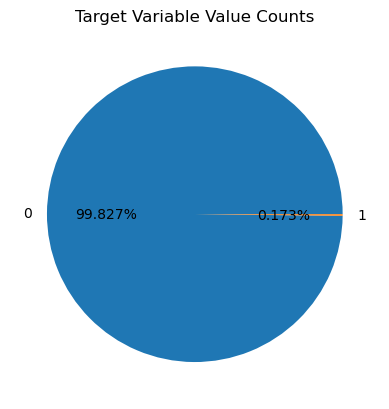

In [4]:
# get the set of distinct classes
labels = raw_data.Class.unique()

# get the count of each class
sizes = raw_data.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

In [5]:
# Filter transactions by class
fraud = raw_data[raw_data["Class"] == 1]
valid = raw_data[raw_data["Class"] == 0]

# Print the number of fraud and valid transactions
print(f'No. of fraud transactions: {len(fraud)}')
print(f'No. of valid transactions: {len(valid)}')



No. of fraud transactions: 492
No. of valid transactions: 284315


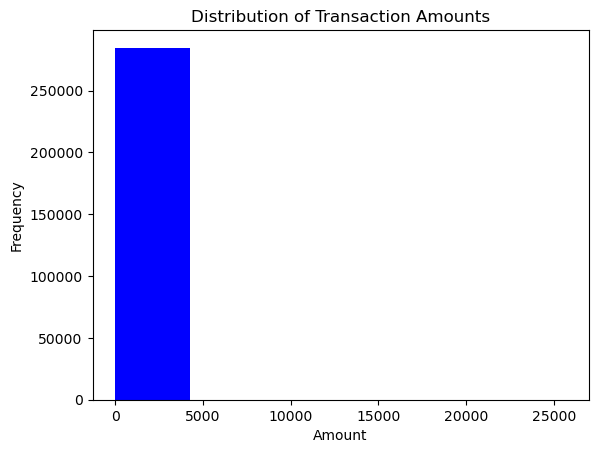

In [6]:
plt.hist(raw_data["Amount"],6,color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


In [7]:
# Get the min and max of the 'Amount' column
min_amount = raw_data['Amount'].min()
max_amount = raw_data['Amount'].max()

print(f"Range of transaction amounts: Min = {min_amount}, Max = {max_amount}")
print("90% of the transactions have an amount less or equal than ", np.percentile(raw_data.Amount.values, 90))

Range of transaction amounts: Min = 0.0, Max = 25691.16
90% of the transactions have an amount less or equal than  203.0


In [8]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# Data Visualisation

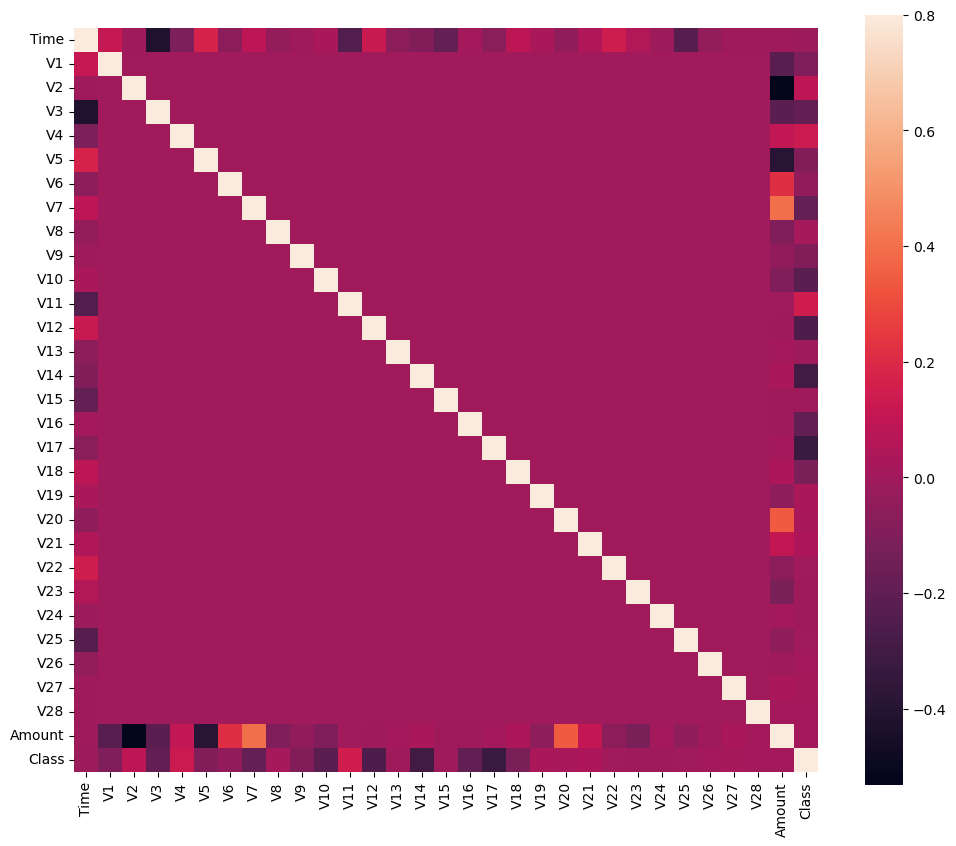

In [10]:
import seaborn as sns
# Correlation matrix
corrmat = raw_data.corr()
fig = plt.figure(figsize = (12,10 ))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

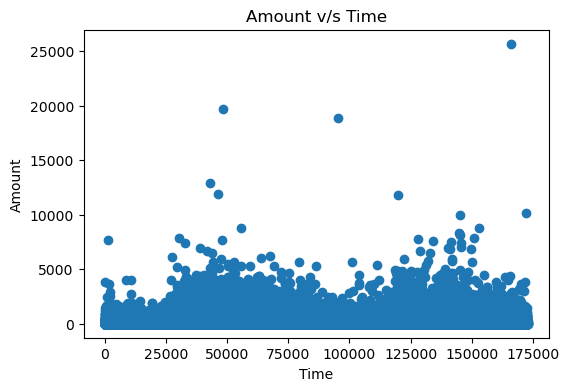

In [11]:
fig= plt.figure(figsize=(6,4))
plt.scatter(raw_data['Time'],raw_data['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Amount v/s Time')
plt.show()

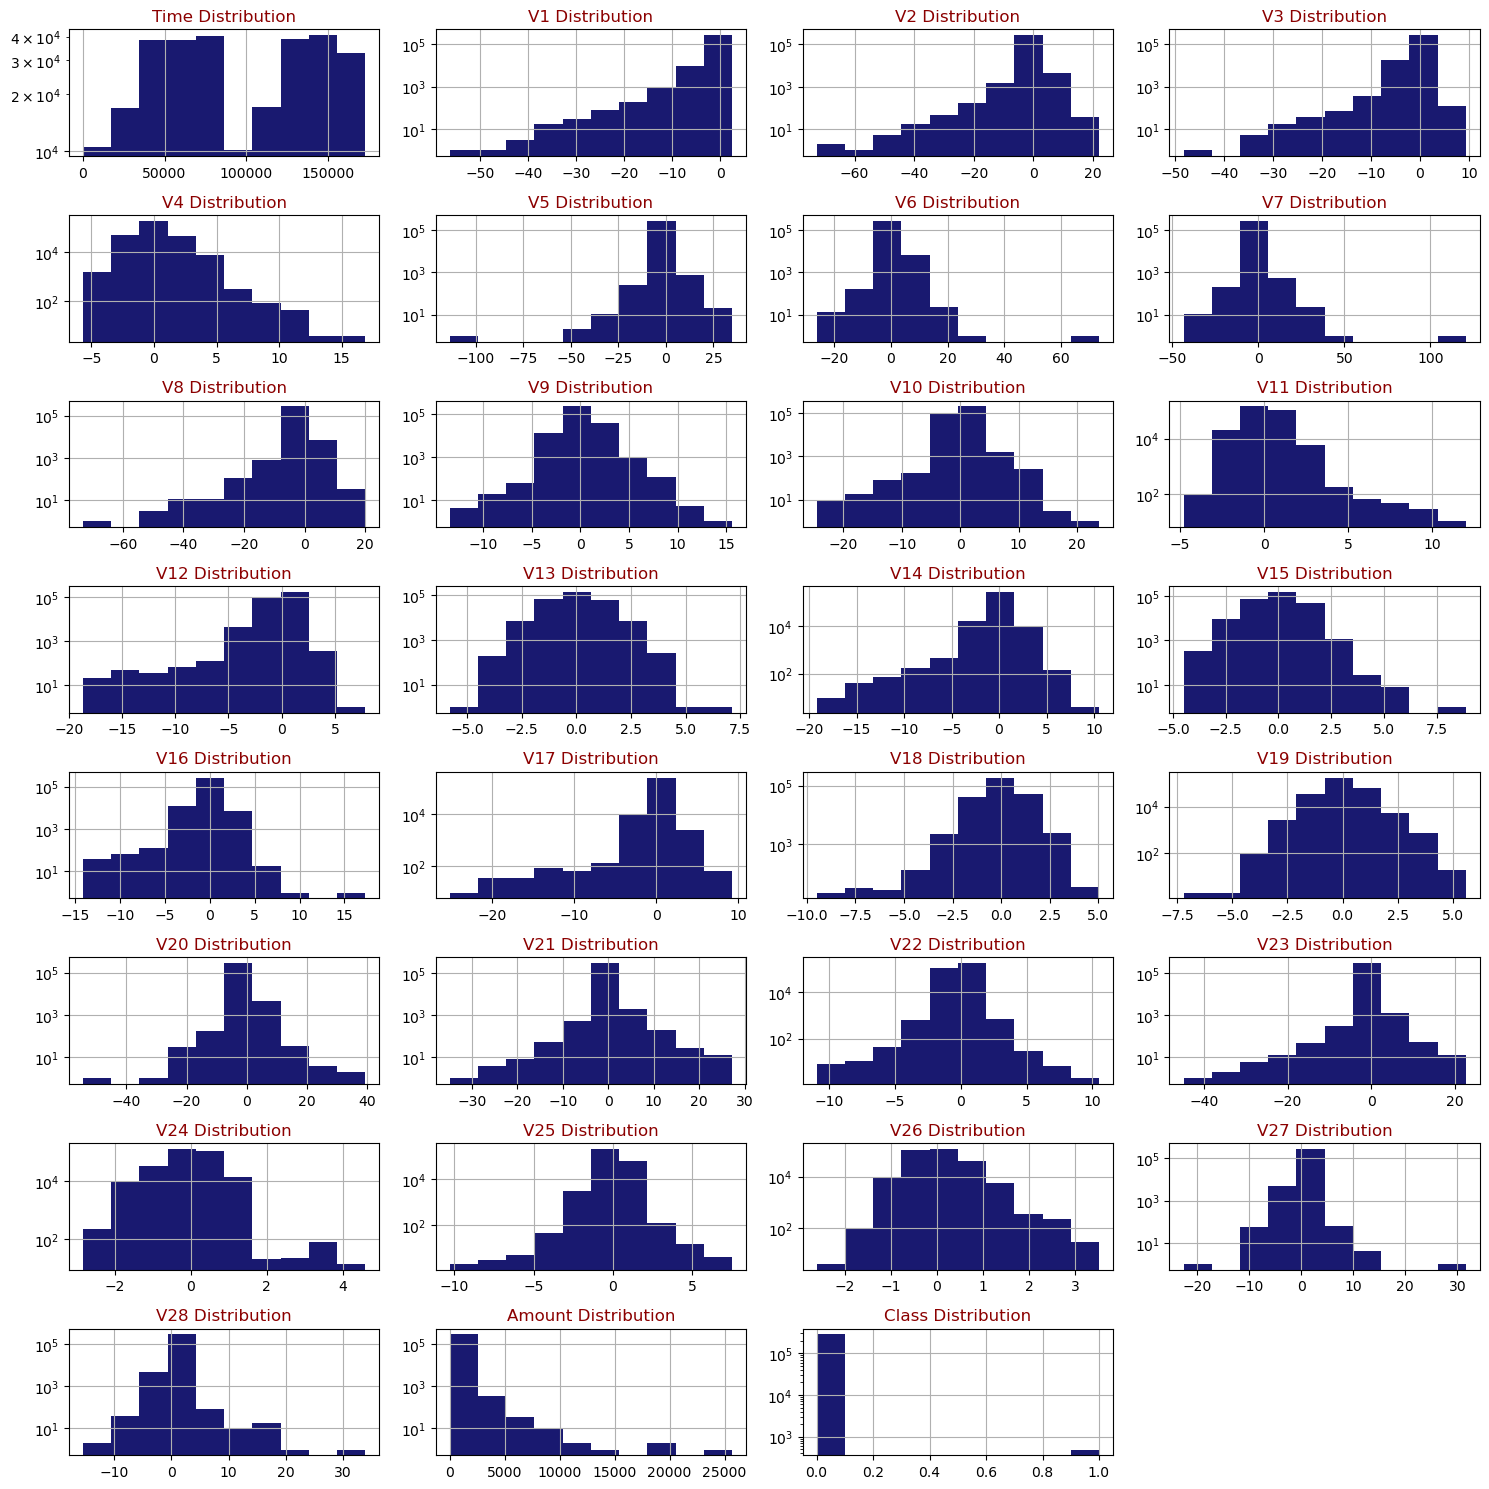

In [12]:
RP=plt.figure(figsize=(15,15))
for i, feature in enumerate(raw_data.columns):
    r=RP.add_subplot(8,4,i+1)
    raw_data[feature].hist(bins=10,ax=r,facecolor='midnightblue')
    r.set_title(feature+" Distribution",color='DarkRed')
    r.set_yscale('log')
RP.tight_layout()  
plt.show()

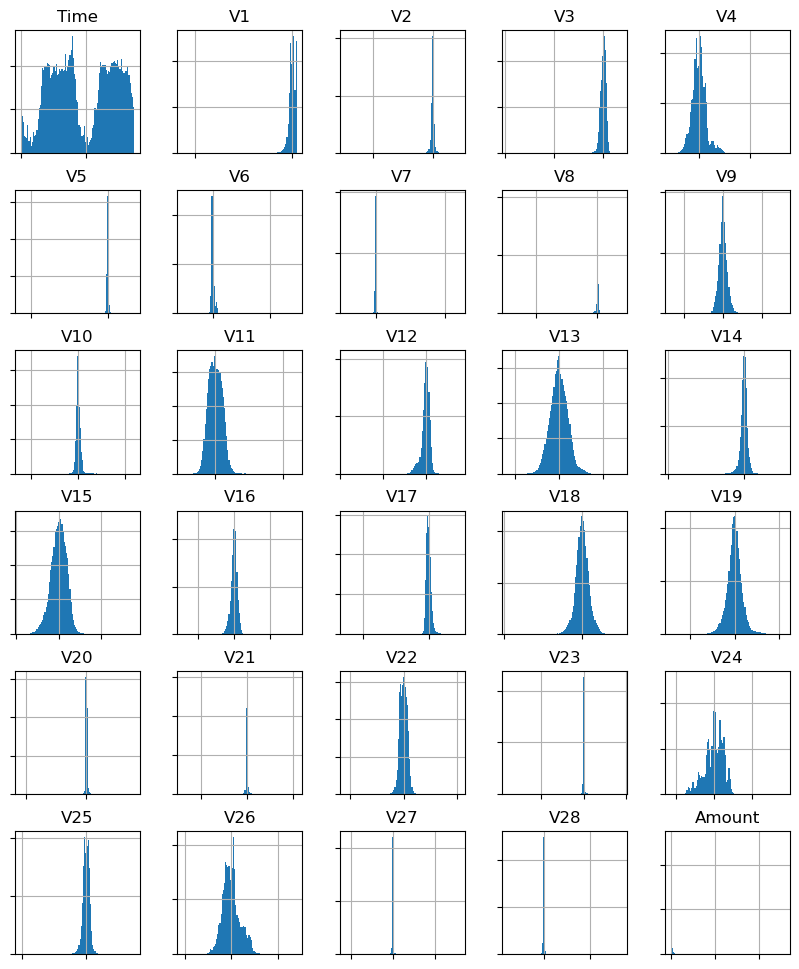

In [13]:
ax = raw_data.drop("Class", axis=1).hist(figsize=(10,12),bins=100)
# We hide the axes' labels to make the plot neater and more compact 
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])

# Builing models

In [14]:
scaler = StandardScaler()
raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(raw_data.iloc[:, 1:30])
data_matrix = raw_data.values


In [15]:
# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
#sum of each elements in the row is equal to 1
X = normalize(X, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (284807, 29) y.shape= (284807,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (199364, 29) Y_train.shape= (199364,)
X_test.shape= (85443, 29) Y_test.shape= (85443,)


In [17]:
# printing every score of the classifier
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# Build the Random Classifier Forest

In [18]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rf = RandomForestClassifier(n_estimators=50, max_depth=5, n_jobs=-1,class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# predictions
y_pred_rf = rf.predict(X_test)

print("The model used is Random Forest classifier")

acc_rf = accuracy_score(y_test, y_pred_rf)
print("The accuracy is {}".format(acc_rf))

prec_rf = precision_score(y_test, y_pred_rf)
print("The precision is {}".format(prec_rf))

rec_rf = recall_score(y_test, y_pred_rf)
print("The recall is {}".format(rec_rf))

f1_rf = f1_score(y_test, y_pred_rf)
print("The F1-Score is {}".format(f1_rf))

MCC_rf = matthews_corrcoef(y_test, y_pred_rf)
print("The Matthews correlation coefficient is{}".format(MCC_rf))

# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc_rf))

The model used is Random Forest classifier
The accuracy is 0.9951078496775628
The precision is 0.23735408560311283
The recall is 0.8243243243243243
The F1-Score is 0.3685800604229607
The Matthews correlation coefficient is0.44081170672235515
[Scikit-Learn] ROC-AUC score : 0.910


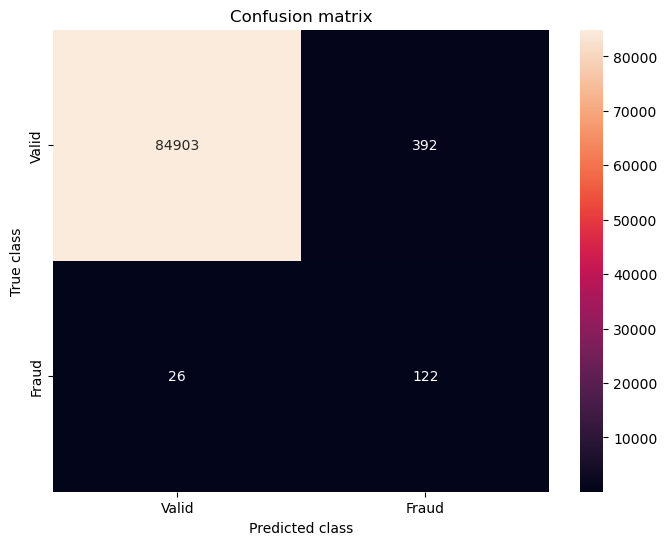

In [19]:
LABELS = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize =(8, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Build a Decision Tree Classifier model 

In [20]:
# import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# for reproducible output across multiple function calls, set random_state to a given integer value
dt = DecisionTreeClassifier(max_depth=4, random_state= 42,class_weight='balanced')

# train a Decision Tree Classifier using scikit-learn
dt.fit(X_train, y_train)


# predictions
y_pred_dt = dt.predict(X_test)

print("The model used is Random Forest classifier")

acc_dt = accuracy_score(y_test, y_pred_dt)
print("The accuracy is {}".format(acc_dt))

prec_dt = precision_score(y_test, y_pred_dt)
print("The precision is {}".format(prec_dt))

rec_dt = recall_score(y_test, y_pred_dt)
print("The recall is {}".format(rec_dt))

f1_dt = f1_score(y_test, y_pred_dt)
print("The F1-Score is {}".format(f1_dt))

MCC_dt = matthews_corrcoef(y_test, y_pred_dt)
print("The Matthews correlation coefficient is{}".format(MCC_dt))

# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc_dt))

The model used is Random Forest classifier
The accuracy is 0.9709982093325374
The precision is 0.04809930178432894
The recall is 0.8378378378378378
The F1-Score is 0.09097578870139399
The Matthews correlation coefficient is0.19667545450341514
[Scikit-Learn] ROC-AUC score : 0.905


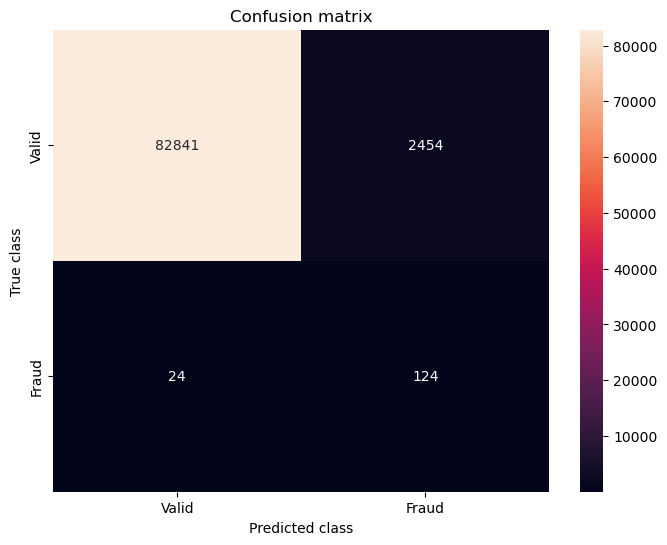

In [21]:
LABELS = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize =(8, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

   # Build a Support Vector Machine model 

In [22]:
#import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

svm = LinearSVC(class_weight='balanced', random_state=31, dual="auto",  max_iter=5000)

# train a linear Support Vector Machine model using Scikit-Learn
svm.fit(X_train, y_train)

# predictions
y_pred_svm = svm.predict(X_test)

print("The model used is Random Forest classifier")

acc_svm = accuracy_score(y_test, y_pred_svm)
print("The accuracy is {}".format(acc_svm))

prec_svm = precision_score(y_test, y_pred_svm)
print("The precision is {}".format(prec_svm))

rec_svm = recall_score(y_test, y_pred_svm)
print("The recall is {}".format(rec_svm))

f1_svm = f1_score(y_test, y_pred_svm)
print("The F1-Score is {}".format(f1_svm))

MCC_svm = matthews_corrcoef(y_test, y_pred_svm)
print("The Matthews correlation coefficient is{}".format(MCC_svm))

# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc_svm))

The model used is Random Forest classifier
The accuracy is 0.9709865056236321
The precision is 0.05017367811655731
The recall is 0.8783783783783784
The F1-Score is 0.09492515516611902
The Matthews correlation coefficient is0.20600791030669324
[Scikit-Learn] ROC-AUC score : 0.925


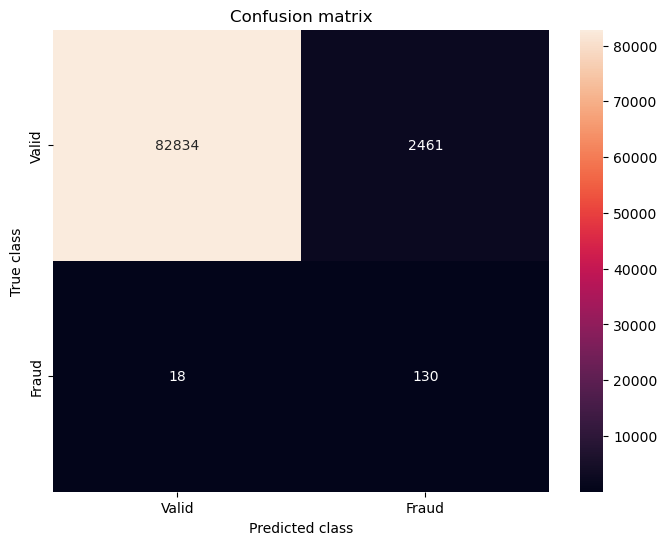

In [23]:
LABELS = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize =(8, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Comparison of Classifier

In [24]:
# List of classifiers to compare

# Dictionary to store the evaluation metrics for each classifier
metrics = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [] ,'Mathews cc':[],'ROC_AUC_score': []}
metrics['Classifier'].append("Random Forest")
metrics['Accuracy'].append(acc_rf)
metrics['Precision'].append(prec_rf)
metrics['Recall'].append(rec_rf)
metrics['F1 Score'].append(f1_rf)
metrics['Mathews cc'].append(MCC_rf)
metrics['ROC_AUC_score'].append(sklearn_roc_auc_rf)
    
metrics['Classifier'].append("Decision Tree")
metrics['Accuracy'].append(acc_dt)
metrics['Precision'].append(prec_dt)
metrics['Recall'].append(rec_dt)
metrics['F1 Score'].append(f1_dt)
metrics['Mathews cc'].append(MCC_dt)
metrics['ROC_AUC_score'].append(sklearn_roc_auc_dt)
    
metrics['Classifier'].append("SVM")
metrics['Accuracy'].append(acc_svm)
metrics['Precision'].append(prec_svm)
metrics['Recall'].append(rec_svm)
metrics['F1 Score'].append(f1_svm)
metrics['Mathews cc'].append(MCC_svm)
metrics['ROC_AUC_score'].append(sklearn_roc_auc_svm)

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
metrics_df

,Classifier,Accuracy,Precision,Recall,F1 Score,Mathews cc,ROC_AUC_score
0,Random Forest,0.995108,0.237354,0.824324,0.368580,0.440812,0.909864
1,Decision Tree,0.970998,0.048099,0.837838,0.090976,0.196675,0.904534
2,SVM,0.970987,0.050174,0.878378,0.094925,0.206008,0.924763
